# Demo2: Simple Harmonic Oscillator with RK2/RK4

In this jupyter notebook, we will learn how to use the Runge-Kutta 2/4 methods to solve for the motions of a simple harmonic oscillaotr.

&copy; Kuo-Chuan Pan, 2024\
For the course "Computational Physics" at NTHU

### Governing equations

The governing equations are 
$$
a^{t^n} = - \omega_0^2 x^{t^n},
$$

$$
\frac{dx}{dt} = v,
$$
and 
$$
\frac{dv}{dt} = a.
$$


### Runge-Jutta methods

Higher-order explicit schemes.

* RK2

$$
y_{k+1} = y_k + \frac{h_k}{2}(k_1 + k_2),
$$
where $k_1 = f(t_k, y_k)$ and $k_2 = f(t_k+h_k, y_k + h_k k1)$.

* RK4

$$
y_{k+1} = y_k + \frac{h_k}{6}(k_1 +2k_2 +2k_3+k_4),
$$
where $k_1= f(t_k,y_k)$, $k_2=f(t_k+h_k/2, y_k + (h_k/2)k_1)$,
$k_3=f(t_k+h_k/2, y_k + (h_k/2)k_2)$, and $k_4=f(t_k+h_k, y_k+h_k k3)$.


### Initial Conditions

At time $t=0$, position $x=1$ and velocity $v=0$.\
Set $A=k=m=1$, and $\omega_0=\sqrt{k/m}=1$ as well.

## Exercie 1: Redo demo1 with the RK2 method
Use a small time step $\Delta t=0.01$ and solve for the solution at $t=20$.

In [1]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#
# This is a simple example of how to solve a simple harmonic oscillator using the RK2 method
#

# Step 1: set up the parameters of the problem
A=1
k=1
m=1
omega0 = np.sqrt(k/m)
dt = 0.01

T = np.arange(0,20,dt)
N = len(T)
X = np.zeros(N)
V = np.zeros(N)
X[0] = A
V[0] = 0

for i in range(1,N):
    def f(t, y):
        return np.array([y[1], -omega0**2*y[0]])

    y = np.array([X[i-1], V[i-1]])
    k1 = f(T[i-1], y)
    k2 = f(T[i], y+dt*k1)
    y = y + dt/2*(k1+k2)

    X[i] = y[0]
    V[i] = y[1]




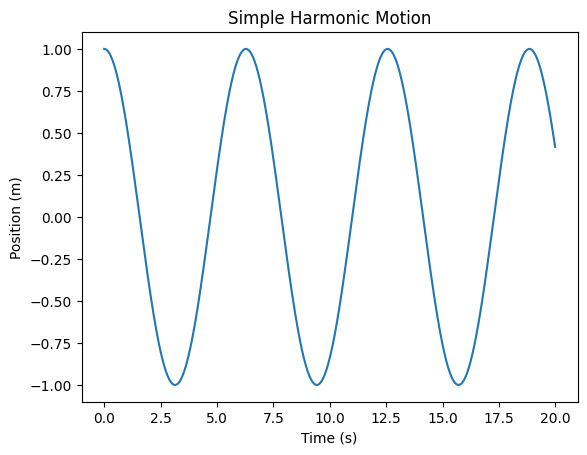

In [5]:
# Step 5: plot the solution
plt.plot(T,X)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Simple Harmonic Motion')
plt.show()

We could verify our numerical solution be comparing it with the analytical solutions.
The analytical solutions are:

$$
x = A \cos(\omega_0 t + \phi),
$$
and

$$
v = -A \omega_0 \sin(\omega_0 t + \delta).

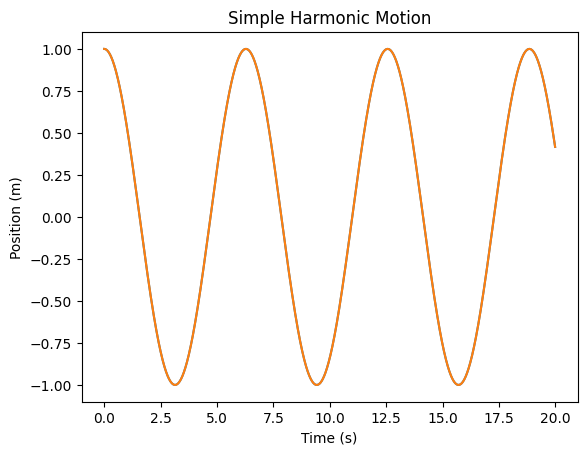

In [6]:
# Step 6: evaluate the analytical solution

X_analytical = A*np.cos(omega0*T)
plt.plot(T,X)
plt.plot(T,X_analytical)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Simple Harmonic Motion')
plt.show()


Another way to chekc the accuray of our numerical solution is to check the energy conservation and the phase-sapce diagram.

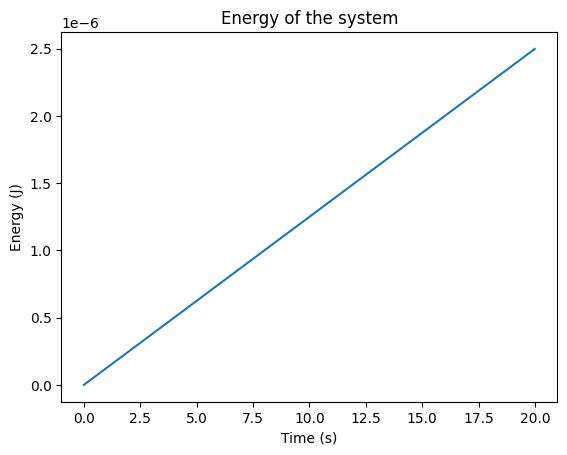

In [9]:
# Step 7: evaluate the energy (error) of the system

E = 0.5*m*V**2 + 0.5*k*X**2
dE = E - E[0]

plt.plot(T,dE)
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Energy of the system')
plt.show()





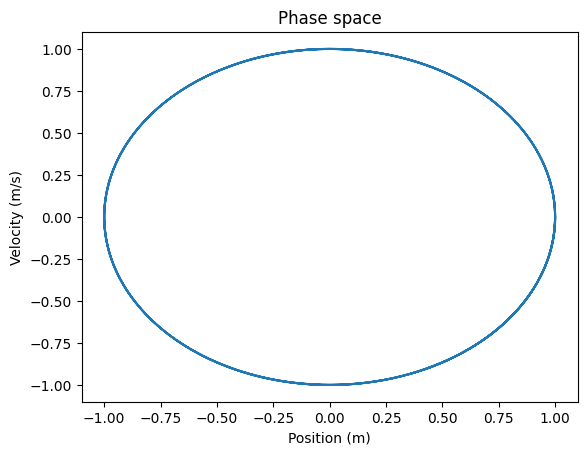

In [10]:
# Step 8: evaluate the phase space

plt.plot(X,V)
plt.xlabel('Position (m)')
plt.ylabel('Velocity (m/s)')
plt.title('Phase space')
plt.show()






## Exercise 2: Repeat with RK4


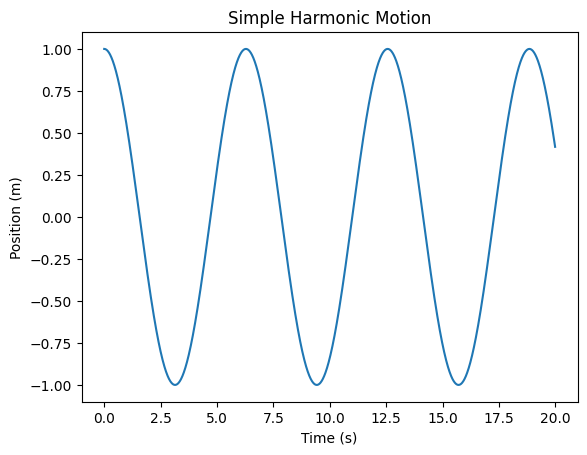

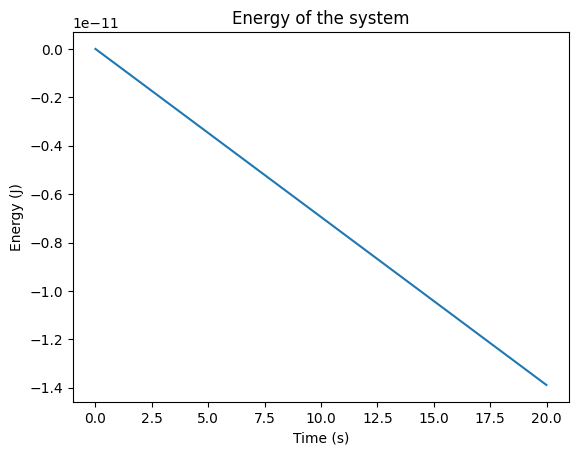

In [12]:
#
# This is a simple example of how to solve a simple harmonic oscillator using the RK4 method
#


for i in range(1,N):
    def f(t, y):
        return np.array([y[1], -omega0**2*y[0]])

    y = np.array([X[i-1], V[i-1]])
    k1 = f(T[i-1], y)
    k2 = f(T[i-1]+dt/2, y+dt/2*k1)
    k3 = f(T[i-1]+dt/2, y+dt/2*k2)
    k4 = f(T[i-1]+dt, y+dt*k3)
    y = y + dt/6*(k1+2*k2+2*k3+k4)

    X[i] = y[0]
    V[i] = y[1]

# Step 5: plot the solution
plt.plot(T,X)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Simple Harmonic Motion')
plt.show()


E = 0.5*m*V**2 + 0.5*k*X**2
dE = E - E[0]

plt.plot(T,dE)
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Energy of the system')
plt.show()
